In [172]:
import numpy as np


def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=-1, keepdims=True)


def attention(Q, K, V):
    attention_weights = softmax(np.matmul(Q, K.T))
    return np.matmul(attention_weights, V), attention_weights

In [173]:
import matplotlib.pyplot as plt
import japanize_matplotlib


def plot_vectors(vectors, texts, ax, arrow_args={}, text_args={}):
    for i, (x, y) in enumerate(vectors):
        ax.annotate("", xy=[x, y], xytext=[0, 0], arrowprops=arrow_args)
        ax.text(x * 1.1, y * 1.1, texts[i], **text_args)


def plot_attention_hist(attention_weights, ax):
    ax.bar(range(len(attention_weights)), attention_weights)
    ax.set_xticks(range(len(attention_weights)))
    ax.set_xticklabels([f"$v_{i+1}$" for i in range(len(attention_weights))])
    ax.set_ylabel("注意度")

In [174]:
import math

n = 10
vectors = []
# 360°をn等分した角度
theta = 2 * math.pi / n
for i in range(n):
    x = math.cos(theta * i)
    y = math.sin(theta * i)
    vectors.append([x, y])

vectors = np.array(vectors)
query = np.array([1 / math.sqrt(2), 1 / math.sqrt(2)])
output, attention_weights = attention(query, vectors, vectors)
print("出力ベクトル:", output)
print("注意度の形:", attention_weights.shape)
print("注意度の和:", attention_weights.sum())

[0.31564538 0.31564537]
(10,)
1.0000000000000002


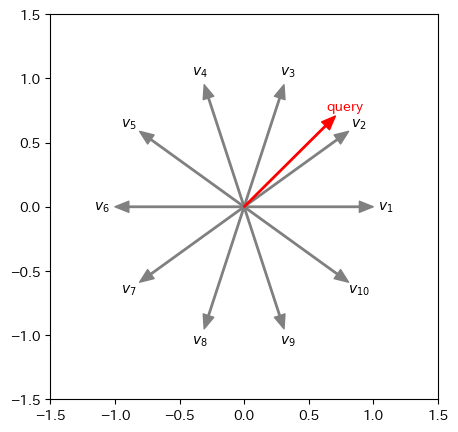

In [175]:
# vectors と query をプロット
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
texts = [f"$v_{{{i+1}}}$" for i in range(n)]
arrow_args1 = dict(
    width=1, headwidth=8, headlength=10, facecolor="gray", edgecolor="gray"
)
text_args1 = dict(ha="center", va="center")
plot_vectors(
    vectors,
    texts,
    ax,
    arrow_args=arrow_args1,
    text_args=text_args1,
)
arrow_args2 = dict(
    width=1, headwidth=8, headlength=10, facecolor="red", edgecolor="red"
)
text_args2 = dict(ha="center", va="center", color="red")
plot_vectors([query], ["query"], ax, arrow_args=arrow_args2, text_args=text_args2)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

fig.savefig("vectors_and_query.png", dpi=144)
plt.show()

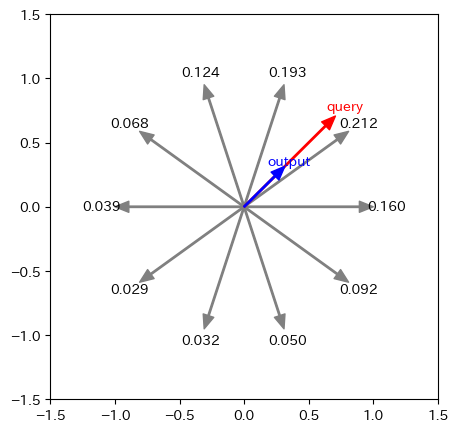

In [176]:
# attention weights をプロット
def plot_attention_weights(vectors, query, output, attention_weights, ax):
    texts = [f"{a:.3f}" for a in attention_weights]

    arrow_args1 = dict(
        width=1, headwidth=8, headlength=10, facecolor="gray", edgecolor="gray"
    )
    text_args1 = dict(ha="center", va="center")
    plot_vectors(
        vectors,
        texts,
        ax,
        arrow_args=arrow_args1,
        text_args=text_args1,
    )
    arrow_args2 = dict(
        width=1, headwidth=8, headlength=10, facecolor="red", edgecolor="red"
    )
    text_args2 = dict(ha="center", va="center", color="red")
    plot_vectors([query], ["query"], ax, arrow_args=arrow_args2, text_args=text_args2)

    arrow_args3 = dict(
        width=1, headwidth=8, headlength=10, facecolor="blue", edgecolor="blue"
    )
    text_args3 = dict(ha="center", va="center", color="blue")
    plot_vectors([output], ["output"], ax, arrow_args=arrow_args3, text_args=text_args3)


fig, ax = plt.subplots(figsize=(5, 5))
plot_attention_weights(vectors, query, output, attention_weights, ax)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

fig.savefig("attention_weights.png", dpi=144)
plt.show()

In [177]:
# 1つだけ長いベクトルがある場合の実験

vectors2 = vectors.copy()
vectors2[3] = vectors2[3] * 5

_, attention_weights2 = attention(query, vectors2, vectors2)

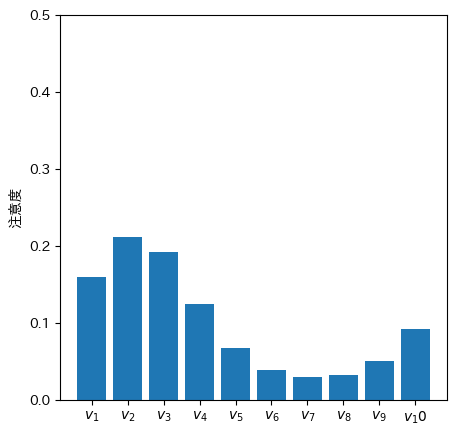

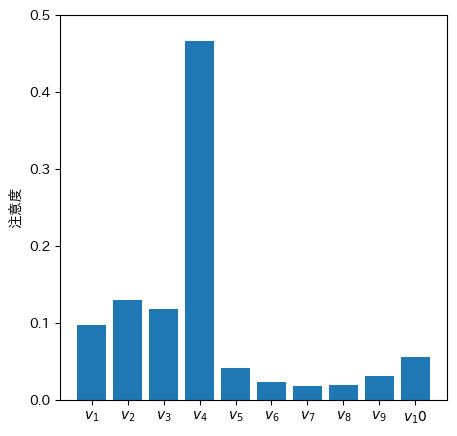

In [178]:
fig, ax = plt.subplots(figsize=(5, 5))
plot_attention_hist(attention_weights, ax)
ax.set_ylim(0, 0.5)
fig.savefig("attention_weights_hist1.png", dpi=144)
plt.show()
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_ylim(0, 0.5)
plot_attention_hist(attention_weights2, ax)
fig.savefig("attention_weights_hist2.png", dpi=144)
plt.show()

In [191]:
queries = np.array([[1 / math.sqrt(2), 1 / math.sqrt(2)], [1, 0], [0, 1]])

output, attention_weights = attention(queries, vectors, vectors)
print("出力の形:", output.shape)
print("注意度行列の形:", attention_weights.shape)
print("注意度の行ごとの和:", attention_weights.sum(axis=1))

出力の形: (3, 2)
注意度行列の形: (3, 10)
注意度の行ごとの和: [1. 1. 1.]
